# Programming for Economics

## Problem Set 01 - Week 2  - Group 02

*24/01/2023*

Importing Libraries

In [79]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1 - Lists and indexing

In [80]:
l1 = [2, 5, 6, 4, 5 ,9, 3, 2, 2]

a. Extract and print the first 3 elements of the list ([2,5,6])

In [81]:
a = l1[0:3]
print(a)

[2, 5, 6]


Extract and print the last 2 elements.

In [82]:
b = l1[-2:]
print(b)

[2, 2]


b. Replace the 3rd element in the list for number 4. Replace the 7th element in the list for
number 7. Print the new list.

In [83]:
l1[2] = 4
l1[6] = 7
print(l1)

[2, 5, 4, 4, 5, 9, 7, 2, 2]


c. Replace the number 9 for 8 using list.index().

In [84]:
#Replace number 9 for 8 in the new list from b) using index method
new_list = l1

a = new_list.index(9)
new_list[a] = 8
print(new_list)

[2, 5, 4, 4, 5, 8, 7, 2, 2]


d. Replace number 9 for number 8 using NumPy argmax.

In [85]:
#Replace number 9 for 8 in the new list from b) using argmax method
new_list = l1

b = np.argmax(new_list)
new_list[b] = 8
print(new_list)

[2, 5, 4, 4, 5, 8, 7, 2, 2]


### Exercise 2 - Arrays and matrix operations

In [86]:
l1 = [2, 5, 6, 4, 5 ,9, 3, 2, 2]
a1 = np.array(l1)

a. Convert the list into a 3 × 3 matrix (2-d array).

In [87]:
A = a1.reshape((3,3))
print(A)

[[2 5 6]
 [4 5 9]
 [3 2 2]]


b. Find the maximum of the matrix A. Find the index of the maximum.


In [88]:
##Method 1: Maximum of Matrix A with ARRAY index
print(A.max())          #Maximum Element
print(A.argmax())       #Array Index

9
5


In [89]:
##Method 2: Maximum of Matrix A with MATRIX index
argm_id = A.argmax()      #Array index
i_row, i_column = np.unravel_index(argm_id, (A.shape))
print(f"Maximum Element: {A[i_row,i_column]}")
print(f"Element Position: {(i_row,i_column)}")

Maximum Element: 9
Element Position: (1, 2)


c. Transpose the matrixA.

In [90]:
A_transposed = A.T
print(A_transposed)

[[2 4 3]
 [5 5 2]
 [6 9 2]]


d. Squared the matrix (i.e. AA′
).

In [91]:
##Method 1: Linear Algebra interpretation of "squaring the matrix" (AA') --> always yields a square, positive semidefinite matrix.

AA_T = np.matmul(A, A_transposed)
print(AA_T)

#Alternatively, use @ operator.

AA_T = A @ A_transposed
print(AA_T)

#Note: np.dot() and np.matmul() yield the same answer only for N-dimensional matrices: where N<=2. For higher dimension
# matrices (3,4,5,..) the answers diverge. Thus, np.matmul() is more robust for calculating the cross product. 

[[ 65  87  28]
 [ 87 122  40]
 [ 28  40  17]]
[[ 65  87  28]
 [ 87 122  40]
 [ 28  40  17]]


For completeness, we show 2 more methods depending on the interpretation of "squaring the matrix"

In [92]:
##Method 2: A more colloquial interpretation of "squaring the matrix" (A^2) --> matrix times itself
AA = np.matmul(A,A)
print(AA)

[[42 47 69]
 [55 63 87]
 [20 29 40]]


In [93]:
##Method 3: Element-wise interpretation of "squaring the matrix" (element_ij^2) --> every element times itself
A_sq = np.square(A)
print(A_sq)

[[ 4 25 36]
 [16 25 81]
 [ 9  4  4]]


In [94]:
## Raising A to the power of every element in the matrix.

(m,n) = A.shape  #show the dimension of matrix A: 3 * 3

for i in range(0,m):
    for j in range(0,n):
        A_elements = A[0+i,0+j] 
        A_raise_power = np.linalg.matrix_power(A, A_elements)  #Raises square matrix A to the power of n=A_elements
        print(A_elements)
        print(A_raise_power )
        
#For instance, if element=5, then A_raise_power=A^5 (i.e., A @ A @ A @ A @ A)

2
[[42 47 69]
 [55 63 87]
 [20 29 40]]
5
[[ 68443  82819 116292]
 [ 89606 108472 152295]
 [ 38687  46816  65759]]
6
[[ 817038  988894 1388613]
 [1069985 1294980 1818474]
 [ 461915  559033  784984]]
4
[[ 5729  6936  9747]
 [ 7515  9077 12756]
 [ 3235  3927  5503]]
5
[[ 68443  82819 116292]
 [ 89606 108472 152295]
 [ 38687  46816  65759]]
9
[[ 1390699352  1683147395 -1931459335]
 [ 1821194179 -2090797271 -1199829397]
 [  786190428   951517457  1336138862]]
3
[[ 479  583  813]
 [ 623  764 1071]
 [ 276  325  461]]
2
[[42 47 69]
 [55 63 87]
 [20 29 40]]
2
[[42 47 69]
 [55 63 87]
 [20 29 40]]


e. Compute the eigenvalues of matrix A.


In [95]:
from numpy.linalg import eig
eigenvalue, vectors = eig(A)
print(eigenvalue)

[11.93968476+0.j         -1.46984238+0.96874799j -1.46984238-0.96874799j]


f. Multiply matrix A by a matrix of zeros (f1), by the identity matrix (f2),and by a matrix of
ones (f3).


In [96]:
#Generating required matricies
f1 = np.zeros((3,3))
f2 = np.eye(3)
f3 = np.ones((3,3))

In [97]:
#Multiplying Matrcies
A_f1 = np.matmul(A, f1)
print(A_f1)
A_f2 = np.matmul(A, f2)
print(A_f2)
A_f3 = np.matmul(A,f3)
print(A_f3)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[2. 5. 6.]
 [4. 5. 9.]
 [3. 2. 2.]]
[[13. 13. 13.]
 [18. 18. 18.]
 [ 7.  7.  7.]]


g. Create an even grid from 0 to 9 with 9 elements. Convert the grid into a 3x3 matrix called B.
Multiply matrix A by matrix B.

In [98]:
#Generate Grid, converting to matrix "B"
B = np.linspace(0, 9,9).reshape(3,3)
print(B)

[[0.    1.125 2.25 ]
 [3.375 4.5   5.625]
 [6.75  7.875 9.   ]]


In [99]:
#Multiplying A by B
AB = np.matmul(A,B)
print(AB)

[[ 57.375  72.     86.625]
 [ 77.625  97.875 118.125]
 [ 20.25   28.125  36.   ]]


### Exercise 3 - for loop

Write a code to iterate the first 10 numbers and in each iteration,
print the sum of the current and previous number.

In [100]:
pre_num = 0    #There's no previous number for the first element

for i in range(0,10):  
    print('Current Number is '+ str(i) + '; Previous Number is '+ str(pre_num) 
          + '; Sum of current and previous num is ' + str(i + pre_num))
    pre_num = i

Current Number is 0; Previous Number is 0; Sum of current and previous num is 0
Current Number is 1; Previous Number is 0; Sum of current and previous num is 1
Current Number is 2; Previous Number is 1; Sum of current and previous num is 3
Current Number is 3; Previous Number is 2; Sum of current and previous num is 5
Current Number is 4; Previous Number is 3; Sum of current and previous num is 7
Current Number is 5; Previous Number is 4; Sum of current and previous num is 9
Current Number is 6; Previous Number is 5; Sum of current and previous num is 11
Current Number is 7; Previous Number is 6; Sum of current and previous num is 13
Current Number is 8; Previous Number is 7; Sum of current and previous num is 15
Current Number is 9; Previous Number is 8; Sum of current and previous num is 17


In [101]:
'''Alternatively, you can also expand the previous
loop to calculate and print the sum of the 
current and previous iterated number for the
FIRST 10 elements of ANY arbitrary array of numbers,
not only all of the elements in range(0,10) '''

numbers = np.arange(0,50,2)  #Arbitrary array
previous_number = 0          #There's no previous number for the first element
count=0

for i in numbers:
    count+=1           
    if count <= 10:          #the print output loop terminates after the 10th element
        sum = previous_number + 1
        print('Current Number : ' + str(i) + '; Sum of Previous and Current Number : '\
          + str(previous_number + i))
        previous_number = i


Current Number : 0; Sum of Previous and Current Number : 0
Current Number : 2; Sum of Previous and Current Number : 2
Current Number : 4; Sum of Previous and Current Number : 6
Current Number : 6; Sum of Previous and Current Number : 10
Current Number : 8; Sum of Previous and Current Number : 14
Current Number : 10; Sum of Previous and Current Number : 18
Current Number : 12; Sum of Previous and Current Number : 22
Current Number : 14; Sum of Previous and Current Number : 26
Current Number : 16; Sum of Previous and Current Number : 30
Current Number : 18; Sum of Previous and Current Number : 34


### Exercise 4 - Conditional statements and operations

In [102]:
l1 = [2, 5, 6, 4, 5 ,9, 3, 2, 2]

a. Create a new list that contains only the elements in list l1 that are smaller than 5.

In [103]:
#Method 1: list comprehension
l2 = [i for i in l1 if i <5]
print(l2)

[2, 4, 3, 2, 2]


In [104]:
#Method 2: for loop
l2=[]    
for i in l1:
    if i<5:
        l2.append(i)
print(l2)

[2, 4, 3, 2, 2]


b. Create a new list that contains only the elements in list l1 bigger or equal than 3 and smaller
than 7.

In [105]:
#Method 1: list comprehension
l3 = [i for i in l1 if i < 7 and i >= 3]
print(l3)

[5, 6, 4, 5, 3]


In [106]:
#Method 2: for loop
l3=[]
for i in l1:
    if (i>=3 and i<7):
        l3.append(i)
print(l3)

[5, 6, 4, 5, 3]


c. Given matrix A from exercise 2, write a code that checks whether 5 belongs to A.

In [107]:
#Method 1: Boolean check
A = np.array(l1).reshape((3,3))
B = 5 in A
print(B)

True


In [108]:
#Method 2: function

def matrix_check(matrix, element):
    count=0
    for i in matrix.flatten():
        if i == element:
            count += 1
    if count == 0:
        return print('"'+str(element)+'"',"not found")
    else:
        return print('"'+str(element)+'"', "found", count, "times")
    
#function test:
matrix_check(A,5) 
matrix_check(A,20)

"5" found 2 times
"20" not found


d. Create a new matrix B that is equal to matrix A but where numbers below 4 are replaced by
zeroz.


In [109]:
#Method 1: conditional indexing
l1 = [2, 5, 6, 4, 5 ,9, 3, 2, 2]
B = np.array(l1).reshape((3,3))
B[B < 4] = 0
print(B)

[[0 5 6]
 [4 5 9]
 [0 0 0]]


e. Write a code that counts the number of zeros in matrix B.


In [110]:
count=0
for i in B.flatten():
    if i==0:
        count += 1
print(count)

4


### Exercise 5 - CES production function and comparative statistics 

a. Create a function that given the arguments K, L, A, α, σ, returns output Y. You can have
inside the function an if statement for when σ = 1 the output Y comes from Cobb-Douglass
production function, else from the CES function.
From now on work with the following parameterization: A = 1.5, α = 0.33.

In [111]:
#Defining production function
def production(A, alpha, K, L, sigma):
    if sigma == 1: 
        Y = A * K**alpha * L**(1-alpha)
    else: 
        Y = A * ((alpha*K**((sigma-1)/(sigma)) + (1-alpha)*L**((sigma-1)/(sigma)))**((sigma)/(sigma-1)))
    return Y

b. Cobb-Douglass production function. First consider the Cobb-Douglass case with σ = 1.
Compute output Y for an even-spaced grid of K, Gk = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}, and a
fixed L = 3. Plot the resuls—make an x-y plot with the grid of K in the x and output Y in
the axis y.


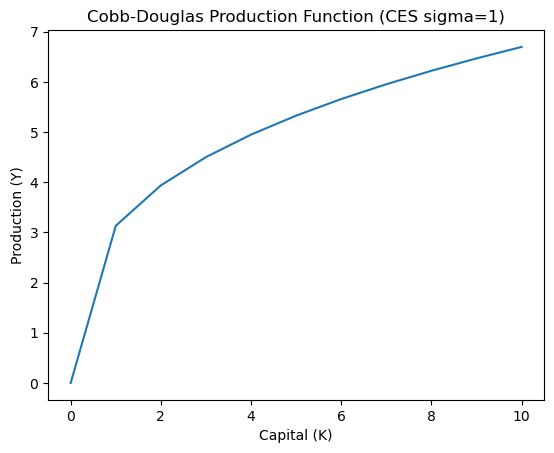

In [112]:
#Assigning values to variables
A = 1.5
L = 3
alpha = 0.33
sigma = 1
K = np.linspace(0,10,11)

#Calculating production for given parameters
Y = production(A, alpha, K, L, sigma)

#Plotting production against capital
plt.plot(K,Y)
plt.xlabel('Capital (K)')
plt.ylabel('Production (Y)')
plt.title('Cobb-Douglas Production Function (CES sigma=1)')
plt.show()

c. From b recompute output Y for the 3 cases α = 0.25, α = 0.5, α = 0.75. Make an x − y plot
with the 3 production functions in the same graph.


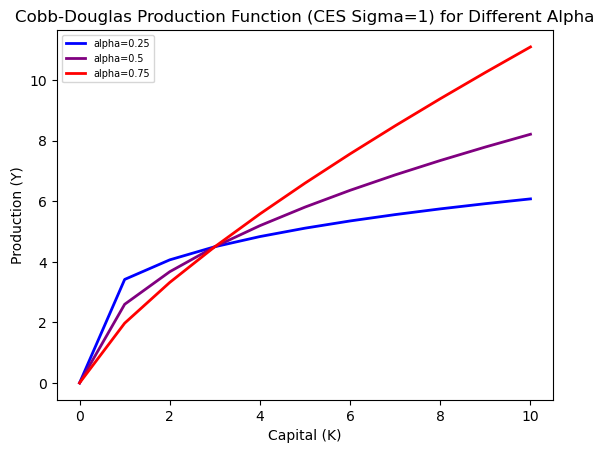

In [113]:
#Setting parameters
A = 1.5
L = 3
sigma = 1
K = np.linspace(0,10,11)

#Calculating and plotting production on K for different alphas
alpha = [0.25,0.5,0.75]
colours = ["blue","purple","red"]  #Setting custom colours of the plotted lines

for i,c in zip(alpha,colours):
    Y = production(A,i,K,L,sigma)
    plt.plot(K,Y, color=c, linewidth=2.0,label=f"alpha={i}")

plt.title('Cobb-Douglas Production Function (CES Sigma=1) for Different Alpha')
plt.xlabel('Capital (K)')
plt.ylabel('Production (Y)')
plt.legend(fontsize=7)
plt.show()

d. CES production function. Redo exercise b but for σ = 0.33

C:\Users\icon8\AppData\Local\Temp\ipykernel_1968\654145091.py:6: RuntimeWarning: divide by zero encountered in power
  Y = A * ((alpha*K**((sigma-1)/(sigma)) + (1-alpha)*L**((sigma-1)/(sigma)))**((sigma)/(sigma-1)))


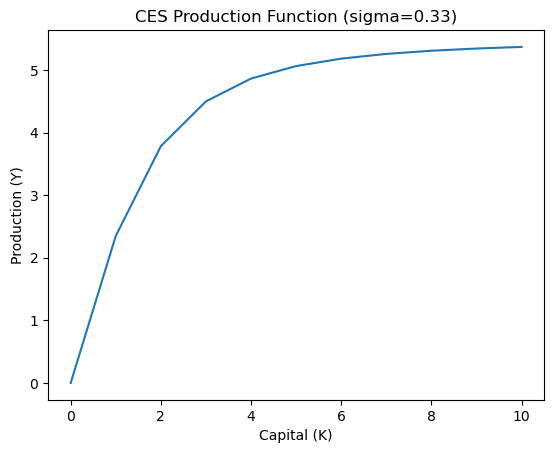

In [114]:
#Setting parameters
A = 1.5
L = 3
alpha = 0.33
sigma = 0.33
K = np.linspace(0,10,11)

#calculate production
Y = production(A, alpha, K, L, sigma)

#Plot production against capital
plt.plot(K,Y)
plt.title('CES Production Function (sigma=0.33)')
plt.xlabel('Capital (K)')
plt.ylabel('Production (Y)')

plt.show()

e. Keeping α = 0.33, plot output Y vs the grid of capital for the cases of σ = 0.25, σ = 0.5, σ =
1, σ = 2, σ = 4.

C:\Users\icon8\AppData\Local\Temp\ipykernel_1968\654145091.py:6: RuntimeWarning: divide by zero encountered in power
  Y = A * ((alpha*K**((sigma-1)/(sigma)) + (1-alpha)*L**((sigma-1)/(sigma)))**((sigma)/(sigma-1)))
C:\Users\icon8\AppData\Local\Temp\ipykernel_1968\654145091.py:6: RuntimeWarning: divide by zero encountered in reciprocal
  Y = A * ((alpha*K**((sigma-1)/(sigma)) + (1-alpha)*L**((sigma-1)/(sigma)))**((sigma)/(sigma-1)))


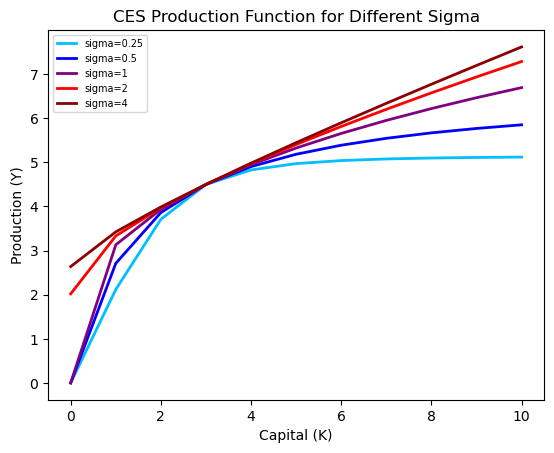

In [115]:
#Set parameters
A = 1.5
L = 3
alpha = 0.33
K = np.linspace(0,10,11)

#Calculating and plotting production on K for different alphas
sigma = [0.25,0.5,1,2,4]
colours = ["deepskyblue","blue","purple","red","darkred"]  #Setting custom colours of the plotted lines

for i,c in zip(sigma,colours):
    Y = production(A,alpha,K,L,i)
    plt.plot(K,Y, color=c, linewidth=2.0,label=f"sigma={i}")

plt.title('CES Production Function for Different Sigma')
plt.xlabel('Capital (K)')
plt.ylabel('Production (Y)')
plt.legend(fontsize=7)
plt.show()

f. How does output Y changes along K for the different σ specifications? Can you provide the
economic interpretation? Hint: σ captures the relative degree of substitutability/complementarity
between the two inputs K, L.


__Answer__:

We observe that as __σ__ increases, the production function becomes more linear. When __σ__ is low (and thus the production function on __K__-space is highly curved), the marginal product of capital is higher at low levels of capital than when __σ__ is high. Similarly, the marginal product of capital (MPK := dY/dK) is lower at high levels of __σ__. We can investigate this relationship by plotting the MPK for different values of __σ__:

In [116]:
'''Define a function that approximates the marginal product of capital (derivative of Y w.r.t K) 
along various points of production in K-space'''

def point_derivative(A,alpha,K,L,sigma):
    k1=K
    k2=K+0.01
    y1=production(A,alpha,k1,L,sigma)
    y2=production(A,alpha,k2,L,sigma)
    return (y2-y1)/(k2-k1)

C:\Users\icon8\AppData\Local\Temp\ipykernel_1968\654145091.py:6: RuntimeWarning: divide by zero encountered in power
  Y = A * ((alpha*K**((sigma-1)/(sigma)) + (1-alpha)*L**((sigma-1)/(sigma)))**((sigma)/(sigma-1)))
C:\Users\icon8\AppData\Local\Temp\ipykernel_1968\654145091.py:6: RuntimeWarning: divide by zero encountered in reciprocal
  Y = A * ((alpha*K**((sigma-1)/(sigma)) + (1-alpha)*L**((sigma-1)/(sigma)))**((sigma)/(sigma-1)))


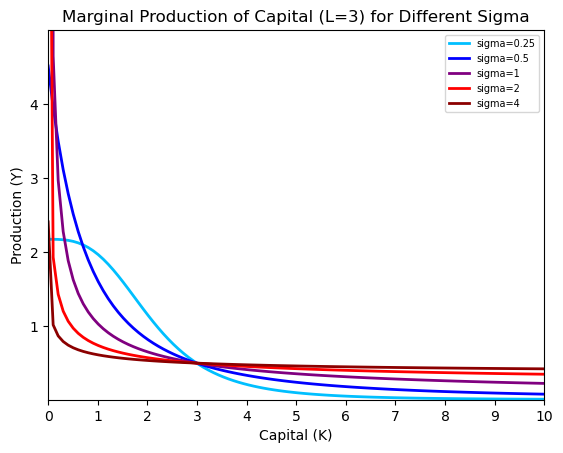

In [117]:
'''Graph the derivatve for different sigmas'''

#Set parameters
A = 1.5
L = 3
alpha = 0.33
K = np.linspace(0,10,100) 

#Calculate and plot the marginal product of capital for different sigma.
sigma = [0.25,0.5,1,2,4]
colours = ["deepskyblue","blue","purple","red","darkred"]  #Setting custom colours of the plotted lines

fig, ax = plt.subplots()

for i,c in zip(sigma,colours):
    MPK = point_derivative(A,alpha,K,L,i)
    plt.plot(K,MPK, color=c, linewidth=2.0,label=f"sigma={i}")

ax.set(xlim=(0,10), xticks=np.arange(0,11))
ax.set(ylim=(0,5), yticks=np.arange(1,5))

plt.title('Marginal Production of Capital (L=3) for Different Sigma')
plt.xlabel('Capital (K)')
plt.ylabel('Production (Y)')
plt.legend(fontsize=7)

plt.show()

Thus, we find that __σ__ captures the curvature of the CES production function and the relative degree of substitutability/complementarity between the two inputs K, L. High __σ__ implies that capital and labour are highly substitutable in the production process (and thus the MPK of capital remains high even when K far outpaces L), while a low __σ__ implies that the inputs are highly complementary (and thus the MPK is relatively low when K is high compared to L). More formally:

$\textbf{σ} \equiv \frac{\partial \ln(k/l)}{\partial \ln(MPL/MPK)}$

In the real world, a high-__σ__ production process might be a factory where a machine and person can produce widgets at similar rates/efficiency. A low-__σ__ production process might be one where each person requires a machine (and vice-versa) in order to produce a widget.